In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy.stats import norm
import statistics
from numpy import mean 
from numpy import std
from statsmodels.graphics.gofplots import qqplot
import statsmodels.graphics.gofplots as sm 
import scipy
from scipy import stats
import scipy.stats as st

In [16]:
project_data = pd.read_csv('data.csv')
descriptive_stats = project_data.describe()
print(descriptive_stats)

         Close_ETF          oil         gold          JPM
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    121.152960     0.001030     0.000663     0.000530
std      12.569790     0.021093     0.011289     0.011017
min      96.419998    -0.116533    -0.065805    -0.048217
25%     112.580002    -0.012461    -0.004816    -0.005538
50%     120.150002     0.001243     0.001030     0.000386
75%     128.687497     0.014278     0.007482     0.006966
max     152.619995     0.087726     0.042199     0.057480


In [17]:
correlation_coefficients = project_data.corr(method='pearson')
print(correlation_coefficients)

           Close_ETF       oil      gold       JPM
Close_ETF   1.000000 -0.009045  0.022996  0.036807
oil        -0.009045  1.000000  0.235650 -0.120849
gold        0.022996  0.235650  1.000000  0.100170
JPM         0.036807 -0.120849  0.100170  1.000000


### Histogram plots

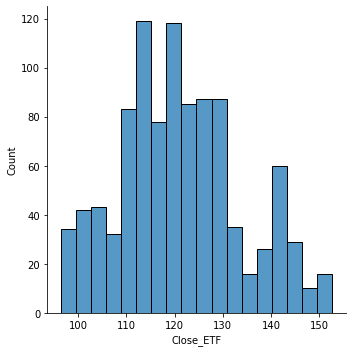

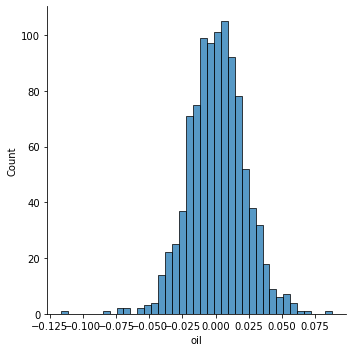

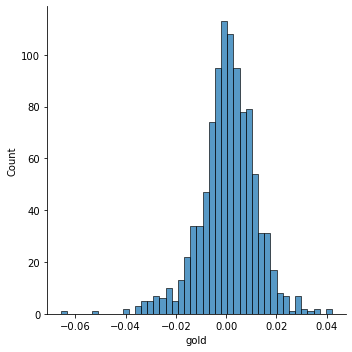

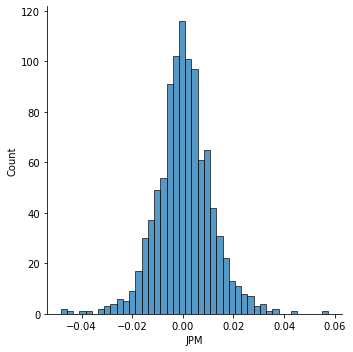

In [18]:
hist_Close_ETF = sns.displot(project_data, x="Close_ETF")

hist_oil = sns.displot(project_data, x="oil")

hist_gold = sns.displot(project_data, x="gold")

hist_JPM = sns.displot(project_data, x="JPM")

### Time series plots

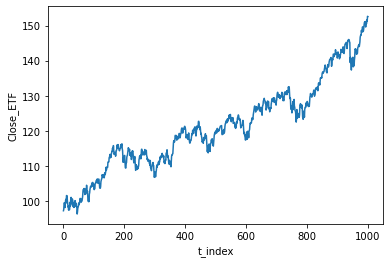

In [19]:
project_data.insert(
    loc=0,
    column='t_index',
    value=np.arange(1,1001)
)

project_data.head()

ts_Close_ETF = sns.lineplot(data=project_data, x="t_index", y="Close_ETF")

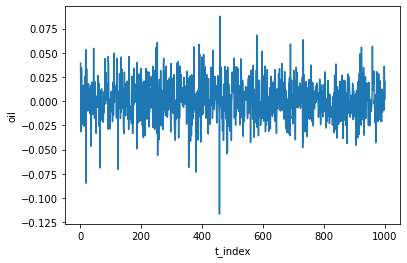

In [20]:
ts_oil = sns.lineplot(data=project_data, x="t_index", y="oil")

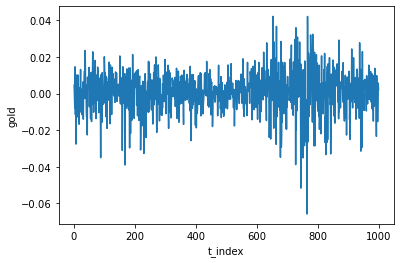

In [21]:
ts_gold = sns.lineplot(data=project_data, x="t_index", y="gold")

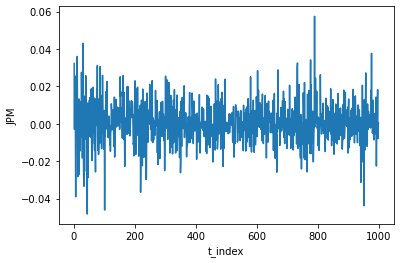

In [22]:
ts_JPM = sns.lineplot(data=project_data, x="t_index", y="JPM")

#### All four series on a single chart

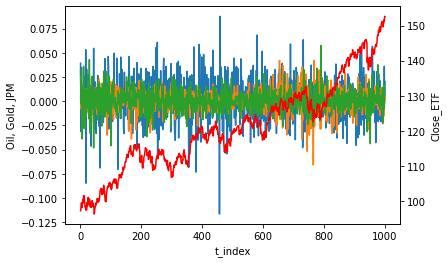

In [8]:
sns.lineplot(data=project_data, x="t_index", y="oil")
sns.lineplot(data=project_data, x="t_index", y="gold")
sns.lineplot(data=project_data, x="t_index", y="JPM")
plt.ylabel('Oil, Gold, JPM')
ax2 = plt.twinx()
sns.lineplot(data=project_data, x="t_index", y="Close_ETF", ax = ax2, color = 'r')

plt.show()

### Scatter plots

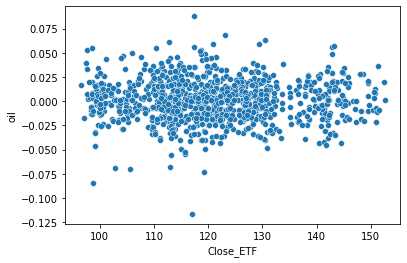

In [11]:
scatter_ETF_oil = sns.scatterplot(data=project_data, x="Close_ETF", y="oil")

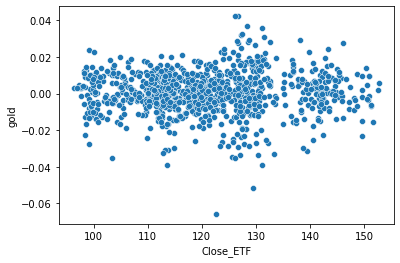

In [12]:
scatter_ETF_gold = sns.scatterplot(data=project_data, x="Close_ETF", y="gold")

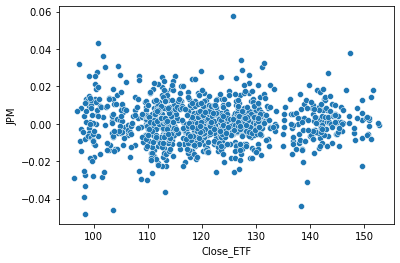

In [13]:
scatter_ETF_JPM = sns.scatterplot(data=project_data, x="Close_ETF", y="JPM")

In [24]:
mean_close_ETF=project_data['Close_ETF'].mean()

In [25]:
print(mean_close_ETF)

121.1529600120001


In [26]:
#mean_close_etf = project_data('Close_ETF').mean()

mean_project_data = project_data.mean()
std_project_data = project_data.std()
print('Mean is: \n',mean_project_data)
print('Standard Deviation is: \n',std_project_data)

Mean is: 
 t_index      500.500000
Close_ETF    121.152960
oil            0.001030
gold           0.000663
JPM            0.000530
dtype: float64
Standard Deviation is: 
 t_index      288.819436
Close_ETF     12.569790
oil            0.021093
gold           0.011289
JPM            0.011017
dtype: float64


121.1529600120001
12.569790313110744


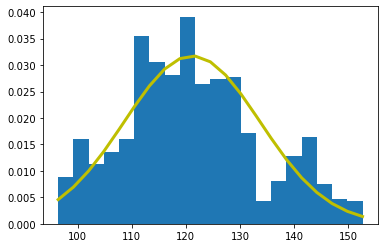

In [32]:
#close_eft
close_etf = project_data['Close_ETF']
mu_closed_etf = close_etf.mean()
sigma_closed_etf = close_etf.std()
print(mu_closed_etf)
print(sigma_closed_etf)

count, bins, ignored = plt.hist(close_etf, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma_closed_etf * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu_closed_etf)**2 / (2 * sigma_closed_etf**2) ), linewidth=3, color='y')
plt.show()

0.0010300354900000003
0.021092898546652347


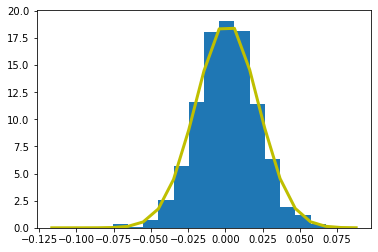

0.0006628360819999998
0.011289060259316142


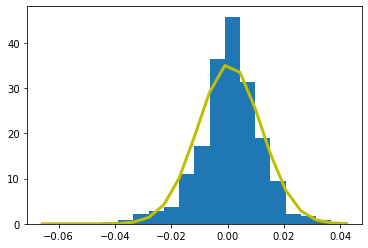

0.0005304110210000002
0.011016562382593569


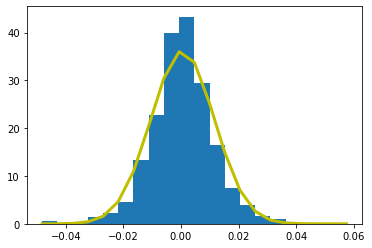

In [33]:
#oil

oil = project_data['oil']
mu_oil = oil.mean()
sigma_oil = oil.std()
print(mu_oil)
print(sigma_oil)

count, bins, ignored = plt.hist(oil, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma_oil * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu_oil)**2 / (2 * sigma_oil**2) ), linewidth=3, color='y')
plt.show()

#gold

gold = project_data['gold']
mu_gold = gold.mean()
sigma_gold = gold.std()
print(mu_gold)
print(sigma_gold)

count, bins, ignored = plt.hist(gold, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma_gold * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu_gold)**2 / (2 * sigma_gold**2) ), linewidth=3, color='y')
plt.show()


#jpm

J_P_M = project_data['JPM']
mu_jpm = J_P_M.mean()
sigma_jpm = J_P_M.std()
print(mu_jpm)
print(sigma_jpm)

count, bins, ignored = plt.hist(J_P_M, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma_jpm * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu_jpm)**2 / (2 * sigma_jpm**2) ), linewidth=3, color='y')
plt.show()

By observing the histogram, the variables are following normal distribution

### NORMALITY TESTS

/Users/athinacordero/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


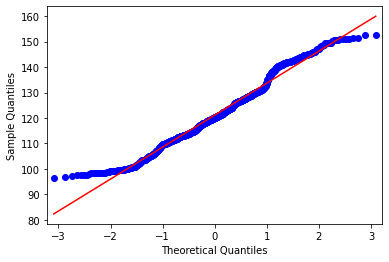

In [35]:
qqplot_project_data_close_etf = qqplot(project_data['Close_ETF'],line='s').gca().lines

/Users/athinacordero/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


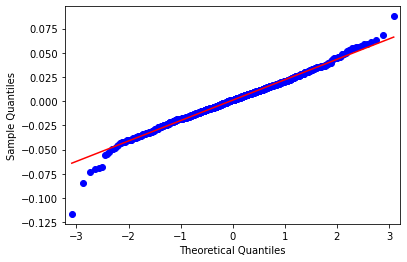

In [36]:
qqplot_project_data_oil = qqplot(project_data['oil'],line='s').gca().lines

/Users/athinacordero/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


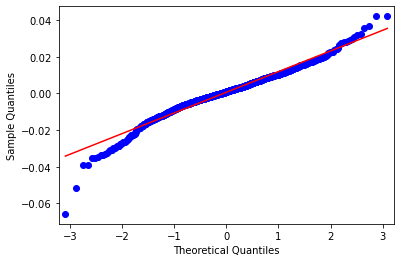

In [37]:
qqplot_project_data_gold = qqplot(project_data['gold'],line='s').gca().lines

/Users/athinacordero/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


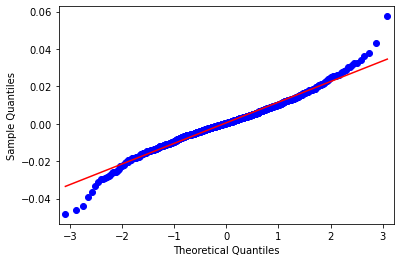

In [38]:
qqplot_project_JPM = qqplot(project_data['JPM'],line='s').gca().lines

/Users/athinacordero/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


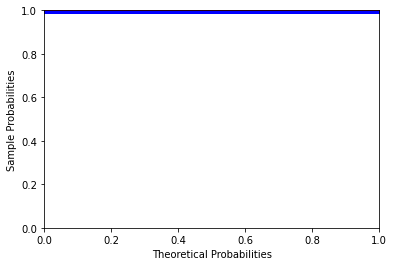

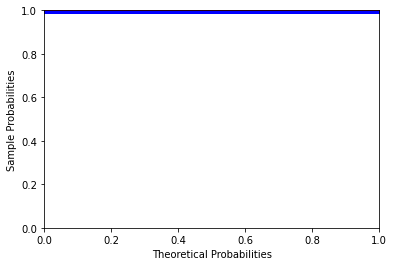

In [39]:
#ppplot_project_data_close_etf = ppplot(project_data['Close_ETF'],line='s').gca().lines
sm.ProbPlot(np.array(project_data['Close_ETF'])).ppplot(line='s') 

/Users/athinacordero/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


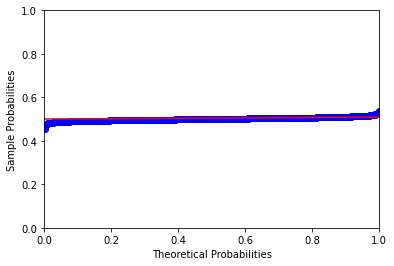

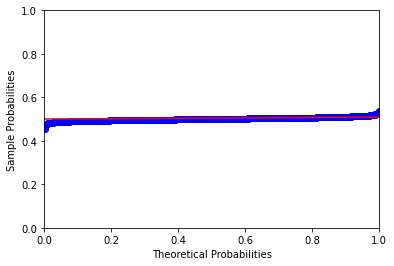

In [40]:
sm.ProbPlot(np.array(project_data['oil'])).ppplot(line='s') 

/Users/athinacordero/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


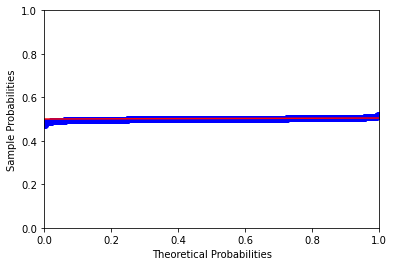

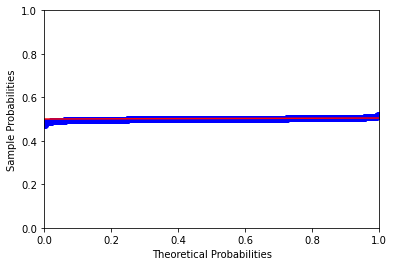

In [41]:
sm.ProbPlot(np.array(project_data['gold'])).ppplot(line='s') 

/Users/athinacordero/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


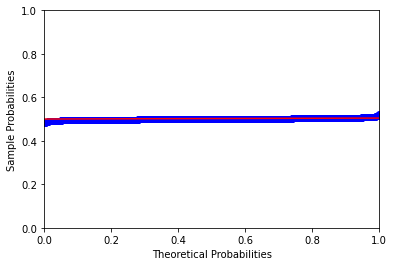

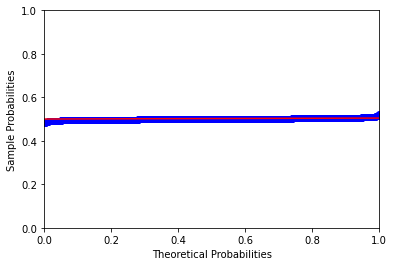

In [42]:
sm.ProbPlot(np.array(project_data['JPM'])).ppplot(line='s') 

In [43]:
from scipy.stats import shapiro
mean_closed_etf = project_data['Close_ETF'].mean()
std_closed_etf = project_data['Close_ETF'].std()
norm_closed_etf = (project_data['Close_ETF'] - mean_closed_etf)/std_closed_etf
stat_c, p_c = shapiro(norm_closed_etf)

# interpret
alpha = 0.0001
if p_c > alpha:
    msg_c = 'Closed-ETF looks Gaussian (fail to reject H0)'
else:
    msg_c = 'Closed-ETF does not look Gaussian (reject H0)'
    
print(msg_c)

Closed-ETF does not look Gaussian (reject H0)


In [44]:
mean_oil = project_data['oil'].mean()
std_oil = project_data['oil'].std()
norm_oil = (project_data['oil'] - mean_oil)/std_oil
stat_o, p_o = shapiro(norm_oil)

# interpret
alpha = 5.488e-08
if p_o > alpha:
    msg_o = 'Oil looks Gaussian (fail to reject H0)'
else:
    msg_o = 'Oil does not look Gaussian (reject H0)'
    
print(msg_o,p_o)

Oil looks Gaussian (fail to reject H0) 5.488897727445874e-07


In [45]:
mean_gold = project_data['gold'].mean()
std_gold = project_data['oil'].std()
norm_gold = (project_data['oil'] - mean_oil)/std_oil
stat_g, p_g = shapiro(project_data['gold'])

# interpret
alpha = 0.05
if p_g > alpha:
    msg_g = 'Gold looks Gaussian (fail to reject H0)'
else:
    msg_g = 'Gold does not look Gaussian (reject H0)'
    
print(msg_g)

Gold does not look Gaussian (reject H0)


In [46]:
stat_j, p_j = shapiro(project_data['JPM'])

# interpret
alpha = 0.05
if p_j > alpha:
    msg_j = 'JPM looks Gaussian (fail to reject H0)'
else:
    msg_j = 'JPM does not look Gaussian (reject H0)'
    
print(msg_j)

JPM does not look Gaussian (reject H0)


# Part 4
#### Q1

In [47]:
project_data['Close_ETF'].mean()

121.1529600120001

In [48]:
project_data['Close_ETF'].std()

12.569790313110744

#### Q2

In [49]:
# 50 groups of 20 values each
close_etf_50_of_20 = np.array_split(project_data['Close_ETF'].to_numpy(), 50)
close_etf_50_of_20

[array([ 97.349998,  97.75    ,  99.160004,  99.650002,  99.260002,
         98.25    ,  99.25    , 100.300003, 100.610001,  99.559998,
        101.660004, 101.660004, 101.57    , 100.019997,  99.440002,
         98.419998,  98.519997,  97.529999,  98.800003,  97.660004]),
 array([ 97.629997,  98.529999,  99.769997,  98.739998, 100.699997,
        101.150002, 100.580002,  99.300003, 100.239998, 100.730003,
        100.510002,  99.919998,  98.5     ,  99.510002,  98.279999,
         99.169998,  99.239998,  98.489998, 100.230003,  99.860001]),
 array([ 99.400002,  99.160004,  99.389999,  98.510002,  98.510002,
         96.419998,  96.980003,  98.      ,  98.279999,  98.650002,
         99.550003,  99.040001,  99.309998,  99.620003, 100.480003,
        100.860001, 100.449997, 100.769997,  99.769997,  99.93    ]),
 array([100.110001, 100.139999, 100.760002, 101.440002, 102.800003,
        103.360001, 103.410004, 102.830002, 103.68    , 103.      ,
        101.959999, 102.260002, 102.449997

#### Q3

In [50]:
close_etf_50_of_20_means = np.mean(close_etf_50_of_20,axis=1)

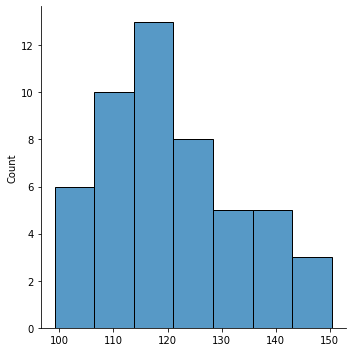

In [51]:
hist_Close_ETF = sns.displot(close_etf_50_of_20_means)

#### Q4

In [52]:
np.asarray(close_etf_50_of_20_means).mean()

121.15296001200001

In [53]:
np.asarray(close_etf_50_of_20_means).std()

12.48917589776901

#### Q5
##### The results are consistent with the Central Limit Theorem

#### Q6

In [54]:
# 50 groups of 20 values each
close_etf_10_of_100 = np.array_split(project_data['Close_ETF'].to_numpy(), 10)
close_etf_10_of_100

[array([ 97.349998,  97.75    ,  99.160004,  99.650002,  99.260002,
         98.25    ,  99.25    , 100.300003, 100.610001,  99.559998,
        101.660004, 101.660004, 101.57    , 100.019997,  99.440002,
         98.419998,  98.519997,  97.529999,  98.800003,  97.660004,
         97.629997,  98.529999,  99.769997,  98.739998, 100.699997,
        101.150002, 100.580002,  99.300003, 100.239998, 100.730003,
        100.510002,  99.919998,  98.5     ,  99.510002,  98.279999,
         99.169998,  99.239998,  98.489998, 100.230003,  99.860001,
         99.400002,  99.160004,  99.389999,  98.510002,  98.510002,
         96.419998,  96.980003,  98.      ,  98.279999,  98.650002,
         99.550003,  99.040001,  99.309998,  99.620003, 100.480003,
        100.860001, 100.449997, 100.769997,  99.769997,  99.93    ,
        100.110001, 100.139999, 100.760002, 101.440002, 102.800003,
        103.360001, 103.410004, 102.830002, 103.68    , 103.      ,
        101.959999, 102.260002, 102.449997, 102.

#### Q7

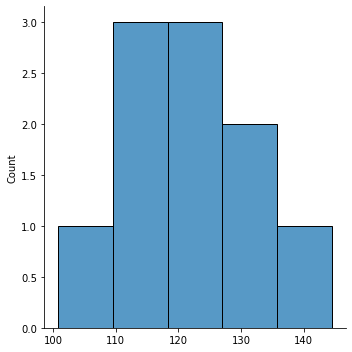

In [55]:
close_etf_10_of_100_means = np.mean(close_etf_10_of_100,axis=1)
hist_Close_ETF = sns.displot(close_etf_10_of_100_means)

In [56]:
np.asarray(close_etf_10_of_100_means).mean()

121.152960012

In [57]:
np.asarray(close_etf_10_of_100_means).std()

12.163756860892589

#### Q8
https://stackoverflow.com/questions/54730276/how-to-randomly-split-a-dataframe-into-several-smaller-dataframes

In [58]:
shuffled = project_data["Close_ETF"].sample(frac=1,replace=True)
close_etf_50_of_20_random = np.array_split(shuffled, 50) 

In [59]:
np.asarray(close_etf_50_of_20_random)

array([[111.830002, 142.160004, 131.029999, 138.080002, 117.309998,
        118.43    , 143.199997, 120.489998, 122.230003,  99.919998,
         97.529999, 109.769997, 121.129997, 121.169998, 112.510002,
        127.980003, 111.889999, 111.059998, 112.089996, 140.220001],
       [103.360001, 113.150002, 130.410004, 114.199997, 107.160004,
        121.940002, 114.360001, 139.470001, 119.629997, 104.989998,
        114.959999, 112.93    , 130.559998, 128.080002, 130.429993,
        107.599998, 100.730003, 109.660004, 112.559998, 148.619995],
       [112.860001, 122.839996, 121.32    , 107.57    , 119.610001,
        138.350006, 114.5     , 119.949997, 141.289993, 108.900002,
        121.220001, 121.220001, 114.370003, 118.790001, 141.369995,
        100.230003, 106.980003, 120.910004, 122.239998, 136.809998],
       [ 98.800003, 108.379997,  99.440002, 112.940002, 116.330002,
        142.339996, 126.419998, 130.639999, 126.660004, 150.949997,
        131.380005, 136.839996,  99.239998, 1

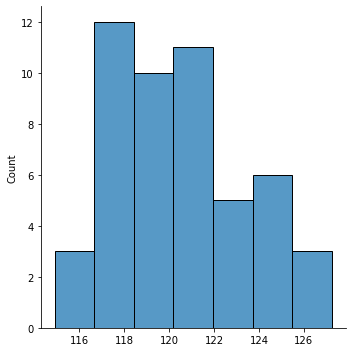

In [60]:
close_etf_50_of_20_random_means = np.mean(close_etf_50_of_20_random,axis=1)
hist_Close_ETF = sns.displot(close_etf_50_of_20_random_means)

In [61]:
np.asarray(close_etf_50_of_20_random_means).mean()

120.38378995400001

In [62]:
np.asarray(close_etf_50_of_20_random_means).std()

2.918985505423409

# Part 5

1. Pick up one of the 10 simple random samples you generated in Step 10) of Part 4, construct an appropriate 95% confidence
interval of the mean.

In [67]:
# mean
mu_x = np.mean(project_data['Close_ETF'])

# standard deviation
sigma_x = np.std(project_data['Close_ETF'])

#  95% CI using one of the 10 SRS with size 100 for mu 
margin_error_100 = 1.96*sigma_x/(100**0.5) 
xbar_100 = close_etf_10_of_100_means[0]
lower_100, upper_100 = (xbar_100 - margin_error_100, xbar_100 + margin_error_100) 
print("95% CI for \u03BC: ({},{})".format(lower_100, upper_100)) 

95% CI for μ: (98.3118535361949,103.23674704380507)


2. Pick up one of the 50 simple random samples you generated in Step 8) of Part 4, construct an appropriate 95% confidence
interval of the mean.

In [70]:
#  95% CI using one of the 50 SRS with size 20 for mu
margin_error_20 = 1.96*sigma_x/(20**0.5) 
xbar_20 = close_etf_50_of_20_means[0] 
lower_20, upper_20 = (xbar_20 - margin_error_20, xbar_20 + margin_error_20) 
print("95% CI for \u03BC: ({},{})".format(lower_20, upper_20)) 

95% CI for μ: (93.81480246751815,104.82719913248187)


3. In Part 1, you have calculated the mean   of the population (the entire ETF column). Do the two intervals from 1) and 2)
above include (the true value of) the mean  ? Which one is more accurate? Why?

In [71]:
print("Population Mean \u03BC = {}".format(mu_x)) 

Population Mean μ = 121.1529600120001


The population mean falls within the 95% confidence intervals for both samples. The first confidence interval is more accurate, which is likely due to its larger sample size. The larger sample size resulted in a narrower confidence interval.

# Part 7

#### #1

In [80]:
significance_level = 0.05
gold_update = project_data['gold'].tolist()
oil_update = project_data['oil'].tolist()

t_test, p_value= stats.ttest_ind(gold_update, oil_update) 
print("The p_value is: ", p_value)

if p_value<significance_level:
    print("The test is failed to reject H0")
else:
    print("The test is reject H0")

The p_value is:  0.6274695292874639
The test is reject H0


### #2

In [81]:
difference_gold_oil = (project_data['gold'] - project_data['oil'])
sample_100_gold_oil = pd.Series(difference_gold_oil.sample(n=100, replace=True)) 
st.norm.interval(alpha=0.95, loc=sample_100_gold_oil.mean(),scale=sample_100_gold_oil.std())
print("The sample of the mean is:",sample_100_gold_oil.mean())
print()

mu_diff = 0
std_diff= sample_100_gold_oil.std()
n_diff = 100
mu_0_diff = 100
S_x_diff = std_diff/np.sqrt(n_diff)
print("The result is:",S_x_diff)

T_test_diff = (mu_diff - mu_0_diff)/S_x_diff
print("The value is:",T_test_diff)

pval_diff = stats.t.sf(np.abs(T_test_diff), n_diff-1)*2
print("The p value is:",pval_diff)

significance_level = 0.05
t_test, p_value= stats.ttest_ind(difference_gold_oil,sample_100_gold_oil) 
print("The p_value is: ", p_value)
if pval_diff>significance_level: print("The test is failed to reject H0") 
else: print("The test is reject H0")

The sample of the mean is: 0.0003590998699999999

The result is: 0.0019669033445850878
The value is: -50841.3391411944
The p value is: 0.0
The p_value is:  0.7451090397108426
The test is reject H0


### #3

In [82]:
significance_level = 0.05

gold_new_update = project_data['gold']
oil_new_update = project_data['oil']

sample_100_gold = pd.Series(gold_new_update.sample(n=100, replace=True)) 
st.norm.interval(alpha=0.95, loc=sample_100_gold.mean(), scale=sample_100_gold.std())

sample_100_oil = pd.Series(oil_new_update.sample(n=100, replace=True)) 
st.norm.interval(alpha=0.95, loc=sample_100_oil.mean(), scale=sample_100_oil.std())

print("The gold sample of the mean is:",sample_100_gold.mean())
print()

print("The oil sample of the mean is:",sample_100_oil.mean())
print()

f = np.var(project_data['gold']) / np.var(project_data['oil'])
n_oil = 50
n_gold = 50
result = 1-scipy.stats.f.cdf(f, n_oil - 1, n_gold -1)

print("The result is: ",result)

if p_value>significance_level:
    print("The test is failed to reject H0")
else:
    print("The test is reject H0")

The gold sample of the mean is: 0.0021888974900000006

The oil sample of the mean is: 0.0024877998599999998

The result is:  0.999987979230873
The test is failed to reject H0
